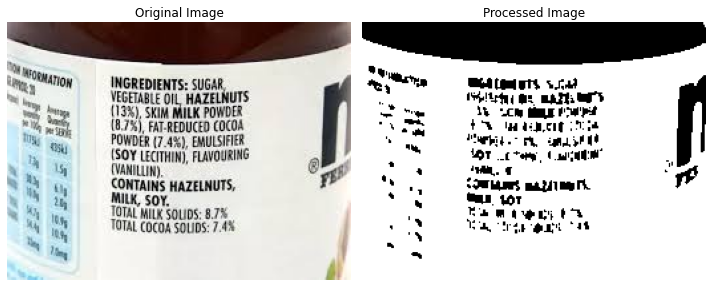

Extracted processed img Text:
Thom me
{a wane
Hed at
oT ay, Ca

fonts saute.
nor
amen tT
Pans

i
x


original img text:
me

°c

09
=

INGREDIENTS: SUGAR,
VESEARE OL nazis
(13%) SKM MLK POWDER
(17%) FarRepuce COCOA
POWDER (74%), ULSI
(SOY Lec), LAURIN
(van,
OnTAIMS HAZELNUTS,
MLK, SOY,
TOMA x Sous: 827%
TOTAL cocoa SOU: 7.48




In [29]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# Function to preprocess image for improved OCR accuracy
def preprocess_image_for_ocr(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to improve text contrast
    _, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

    # Remove noise by applying a median blur
    processed_image = cv2.medianBlur(thresh_image, 3)
    
    return processed_image, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img3.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')  # Use 'gray' colormap for the processed image
plt.title("Processed Image")
plt.axis('off')  # Hide axes

# Show the images
plt.tight_layout()
plt.show()


# Perform OCR on the processed image
# Note: pytesseract can work directly with the NumPy array
text = pytesseract.image_to_string(processed_image)
text2=pytesseract.image_to_string(Image.open(image_path))
# Print the extracted text
print("Extracted processed img Text:")
print(text)
print("original img text:")
print(text2)

In [11]:
#img1 gray_scaling works best,blur is worst
#img2 gray_Scaling fails,thresh_image is ok,blur is worst

In [14]:
#histogram and other techniques

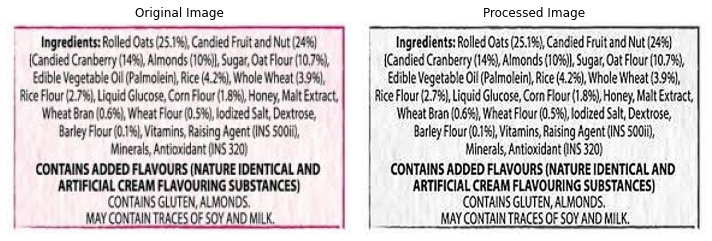

Extracted processed img Text:
Ingredients: Rolled Oats (25.1%), Cendied Fruit and Nut (24%)

{ {Candied Cranberry (149), Almonds (10%4)}, Sugar, Oat Flour (10.79),
Edible Vegetable Oil (Palmolein}, Rice (4.2%), Whole Wheat (3.9%),

Rice Flour {2.75 Liquid Glucose, Corn Flour (1.8%), Honey, Malt Extract,
Wheat Bran (0.6%), Wheat Flour (0.5%), fodized Salt, Dextrose,

Barley Flour 0.1%}, Vitamins, Raising Agent (INS 500i),
Minerals, Antioxidant (INS 320)
| CONTAINS ADDED FLAVOURS (NATURE IDENTICAL AND
| ARTIFICIAL CREAM FLAVOURING SUBSTANCES)

CONTAINS GLUTEN, ALMONDS,
MAY CONTAIN TRACES OF SOY AND MILK.

original img text:
Ingredients: Rolled Cts (2518) Canie Frutand Nut (248)
{Candied Cranberry (Almond (0 Sugar, Ot lu 1.7,
| _ Edible Vegetable i Pinon ice (4.2) Whole Whest 3.9%),
Fic Fou (27 Liquid Glucose, Corn ou (3 Honey Malt Etat,
‘het ran (6) Wheat For odd Sh Destro,
Bate Flou(01, Vitamins Rain Agent NS Sti,
ines, Antonia ONS 320)
| conta aooeD Favours NATURE IDENTICAL AND

ARTIFI

In [67]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np

# Function to preprocess image for improved OCR accuracy
def preprocess_image_for_ocr(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    resized_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)   
    
   #Sharpening the Image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    k=cv2.filter2D(resized_image, -1, kernel)
     
        
    return k, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img2.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')  # Use 'gray' colormap for the processed image
plt.title("Processed Image")
plt.axis('off')  # Hide axes

# Show the images
plt.tight_layout()
plt.show()


# Perform OCR on the processed image
# Note: pytesseract can work directly with the NumPy array
text = pytesseract.image_to_string(processed_image)
text2=pytesseract.image_to_string(Image.open(image_path))
# Print the extracted text
print("Extracted processed img Text:")
print(text)
print("original img text:")
print(text2)

In [68]:
#gausiaan blur worked little well in img1 and 3
#gray scaling and resize works best

In [69]:
import pandas as pd

# Load ingredient dataset
dataset_path = 'edited_temp.xlsx'
ingredient_data = pd.read_excel(dataset_path)


#ingredient_data = pd.read_csv(dataset_path)
# Create a dictionary mapping
ingredient_dict = ingredient_data.set_index('Ingredient').to_dict(orient='index')
print("Ingredient Dictionary Sample:", list(ingredient_dict.items())[:5])


Ingredient Dictionary Sample: [('corn flour', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('wheat flour', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('cocoa solids', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('Milk solids', {'Category ': 'Natural', 'Description': 'Unprocessed'}), ('edible palm oil', {'Category ': 'Natural', 'Description': 'Unprocessed'})]


In [75]:
from PIL import Image
import pytesseract
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re


# Preprocess text and detect ingredients
def preprocess_text(text, ingredient_dict):
    # Common OCR corrections
    
        
    # Clean text
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text).lower()
    tokens = word_tokenize(text)
    
    # Multi-word matching
    matched_ingredients = set()
    max_ngram_length = max(len(ingredient.split()) for ingredient in ingredient_dict.keys())
    
    for n in range(1, max_ngram_length + 1):
        for ngram in ngrams(tokens, n):
            phrase = ' '.join(ngram)
            if phrase in ingredient_dict:
                matched_ingredients.add(phrase)
    
    return list(matched_ingredients)

# Classify ingredients
def classify_ingredients(ingredients, ingredient_dict):
    classifications = []
    for item in ingredients:
        if item in ingredient_dict:
            info = ingredient_dict[item]
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': info['Category'],
                'Description': info['Description']
            })
        else:
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': 'Unknown',
                'Description': 'Information not available'
            })
    return classifications

preprocess_text(text, ingredient_dict)
classify_ingredients(ingredients, ingredient_dict)

KeyError: 'Category'

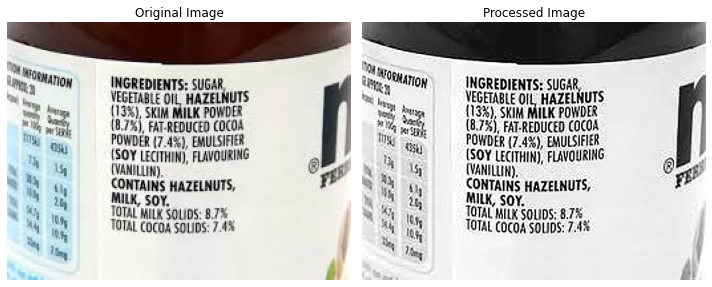

Extracted processed img Text:
INGREDIENTS: SUGAR
VEGETABLE ott HAZELNUTS
(138), SKIM MILK POWDER
(8.7%), FAT-REDUCED COCOA
POWDER (7.4%), EMULSIFIER
(SOY LECITHIN), FLAVOURING
(VANILUIH),

CONTAINS HAZELNUTS,
Mu

SOY.
TOTAL MILK SOLIDS: 8.7%
TOTAL COCOA SOLIDS: 7.4%

i>)
|

Classified Ingredients:
{'Ingredient': 'Cocoa solids', 'Category': 'Natural', 'Description': 'Unprocessed'}


In [79]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# Function to preprocess image for improved OCR accuracy
def preprocess_image_for_ocr(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Sharpening the Image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(resized_image, -1, kernel)

    return sharpened_image, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img3.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Perform OCR on the processed image
text = pytesseract.image_to_string(processed_image)

# Print the extracted text
print("Extracted processed img Text:")
print(text)

# Load ingredient dataset
dataset_path = 'edited_temp.xlsx'
ingredient_data = pd.read_excel(dataset_path)

# Create a dictionary mapping
ingredient_dict = ingredient_data.set_index('Ingredient').to_dict(orient='index')

# Preprocess text and detect ingredients
def preprocess_text(text, ingredient_dict):
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text).lower()
    tokens = word_tokenize(text)
    matched_ingredients = set()
    max_ngram_length = max(len(ingredient.split()) for ingredient in ingredient_dict.keys())

    for n in range(1, max_ngram_length + 1):
        for ngram in ngrams(tokens, n):
            phrase = ' '.join(ngram)
            if phrase in ingredient_dict:
                matched_ingredients.add(phrase)

    return list(matched_ingredients)

# Classify ingredients
def classify_ingredients(ingredients, ingredient_dict):
    classifications = []
    for item in ingredients:
        if item in ingredient_dict:
            info = ingredient_dict[item]
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': info['Category '],
                'Description': info['Description']
            })
        else:
            classifications.append({
                'Ingredient': item.capitalize(),
                'Category': 'Unknown',
                'Description': 'Information not available'
            })
    return classifications

# Process and classify ingredients
ingredients = preprocess_text(text, ingredient_dict)
classified_ingredients = classify_ingredients(ingredients, ingredient_dict)

# Print classified ingredients
print("Classified Ingredients:")
for classified in classified_ingredients:
    print(classified)

In [84]:
from transformers import AutoTokenizer, VisionEncoderDecoderModel

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("jinhybr/OCR-Donut-CORD")
model = VisionEncoderDecoderModel.from_pretrained("jinhybr/OCR-Donut-CORD")



pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

In [82]:
!pip install torch

In [86]:
!pip install transformers

In [89]:
from transformers import pipeline

ocr_pipe = pipeline("image-to-text", model="microsoft/trocr-base-printed")


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

ValueError: Unrecognized feature extractor in microsoft/trocr-base-printed. Should have a `feature_extractor_type` key in its preprocessor_config.json of config.json, or one of the following `model_type` keys in its config.json: audio-spectrogram-transformer, beit, chinese_clip, clap, clip, clipseg, conditional_detr, convnext, cvt, data2vec-audio, data2vec-vision, deformable_detr, deit, detr, dinat, donut-swin, dpt, encodec, flava, glpn, groupvit, hubert, imagegpt, layoutlmv2, layoutlmv3, levit, maskformer, mctct, mobilenet_v1, mobilenet_v2, mobilevit, nat, owlvit, perceiver, poolformer, regnet, resnet, segformer, sew, sew-d, speech_to_text, speecht5, swiftformer, swin, swinv2, table-transformer, timesformer, tvlt, unispeech, unispeech-sat, van, videomae, vilt, vit, vit_mae, vit_msn, wav2vec2, wav2vec2-conformer, wavlm, whisper, xclip, yolos

In [90]:
results = ocr_pipe("C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img3.jpg")
print(results[0]['text'])

NameError: name 'ocr_pipe' is not defined

In [88]:
print("hi")

hi


In [4]:
import requests
import json

def ocr_space_file(filename, overlay=False, api_key='K89439998188957', language='eng'):
    payload = {
        'isOverlayRequired': overlay,
        'apikey': api_key,
        'language': language,
    }
    with open(filename, 'rb') as f:
        r = requests.post('https://api.ocr.space/parse/image',
                          files={filename: f},
                          data=payload,
                          )
    return r.content.decode()

def ocr_space_url(url, overlay=False, api_key='K89439998188957', language='eng'):
    payload = {
        'url': url,
        'isOverlayRequired': overlay,
        'apikey': api_key,
        'language': language,
    }
    r = requests.post('https://api.ocr.space/parse/image',
                      data=payload,
                      )
    return r.content.decode()

# Use examples:
test_file = ocr_space_file(filename="C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img1.jpg")
print("OCR result from file:")
file_result = json.loads(test_file)
parsed_text_file = file_result["ParsedResults"][0]["ParsedText"]
print("Parsed Text from file:", parsed_text_file)




OCR result from file:
Parsed Text from file: INGREDIENTS: Enriched unbleached
flour (wheat flour, malted barley flour,
astcrblt acid duh conditioner], niacin,
reduced iron, tniarnin mononitrate,
riboflavin, folic acidl sugar, de ermed
yellow cornmeal, salt, leavenin ibakin
soda, sodium acid pyrop\osphatel
soybean oil, honey powder, natural flavor
CONTAINS: Wheat.
May contain milk, eggs, soy and tree nuts.



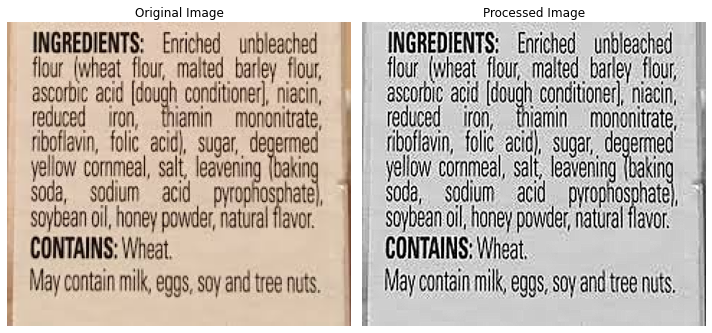

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Data
def preprocess_image_for_ocr(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Sharpening the Image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(resized_image, -1, kernel)

    return sharpened_image, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the image path
image_path = "C:\\Users\\DC\\Desktop\\Sem 7\\NLP\\NLP PROJECT\\img1.jpg"

# Preprocess the image
processed_image, original_image = preprocess_image_for_ocr(image_path)

# Plotting the original and processed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.tight_layout()
plt.show()



In [6]:
!pip install easyocr

In [7]:
import easyocr
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory
result = reader.readtext(processed_image)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
result

[([[26, 4], [440, 4], [440, 52], [26, 52]],
  'WEREOIENTS:  Eniched Unleached',
  0.06633418429378184),
 ([[28, 40], [444, 40], [444, 91], [28, 91]],
  'for lweat Hcur magd barey HOU',
  0.06875014934492436),
 ([[29, 75], [443, 75], [443, 119], [29, 119]],
  "3SCCIOIC aCC lcough concitone 'niacn",
  0.054061657656875824),
 ([[29, 113], [117, 113], [117, 151], [29, 151]],
  'rdpe',
  0.024694157764315605),
 ([[135, 115], [187, 115], [187, 151], [135, 151]], 'iro', 0.4170253346986676),
 ([[207, 111], [293, 111], [293, 151], [207, 151]],
  'tmin',
  0.26273542642593384),
 ([[313, 115], [439, 115], [439, 153], [313, 153]],
  'mononitrate',
  0.7475378864131073),
 ([[25, 140], [330, 140], [330, 194], [25, 194]],
  'rbollyin, {oc acic, SUgaC',
  0.007199442367702607),
 ([[26, 178], [360, 178], [360, 230], [26, 230]],
  'ylCw cOmmeal salt leaiening',
  0.09787379011370836),
 ([[322, 138], [446, 138], [446, 236], [322, 236]],
  '脚o',
  8.95458835673668e-05),
 ([[27, 217], [89, 217], [89, 255],

# trying code  
Step 1: Detect edges.
Step 2: Use the edges in the image to find the contour (outline) representing the piece of paper being scanned.
Step 3: Apply a perspective transform to obtain the top-down view of the document.

In [14]:

from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils


import numpy as np
import cv2

def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    return warped


# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
                help="img1.jpg")
args = vars(ap.parse_args())

# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread(args["image"])
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height=500)

# convert the image to grayscale, blur it, and find edges
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# show the original image and the edge-detected image
print("STEP 1: Edge Detection")
cv2.imshow("Image", image)
cv2.imshow("Edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # if our approximated contour has four points, then we
    # can assume we have found the screen
    if len(approx) == 4:
        screenCnt = approx
        break

# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.imshow("Outline", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# apply the four-point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset=10, method="gaussian")
warped = (warped > T).astype("uint8") * 255

# show the original and scanned images
print("STEP 3: Apply perspective transform")
cv2.imshow("Original", imutils.resize(orig, height=650))
cv2.imshow("Scanned", imutils.resize(warped, height=650))
cv2.waitKey(0)


usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

C:\Users\DC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


STEP 1: Edge Detection


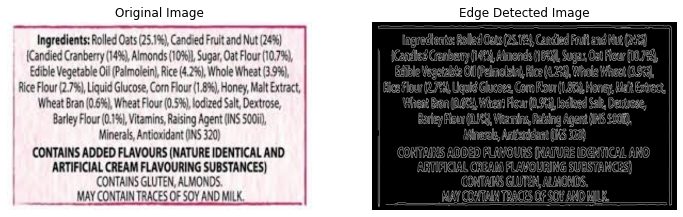

In [19]:
import numpy as np
import cv2
import imutils
from skimage.filters import threshold_local
import matplotlib.pyplot as plt

# Manually set the path to the image
image_path = "img2.jpg"

# Load the image and compute the ratio of the old height
image = cv2.imread(image_path)
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height=500)

# Convert the image to grayscale, blur it, and find edges
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# Show the original image and the edge-detected image using matplotlib
print("STEP 1: Edge Detection")

# Create a plot to display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Edge-detected image
ax[1].imshow(edged, cmap='gray')
ax[1].set_title('Edge Detected Image')
ax[1].axis('off')

# Show the plot
plt.show()





STEP 2: Bounding Box Detection


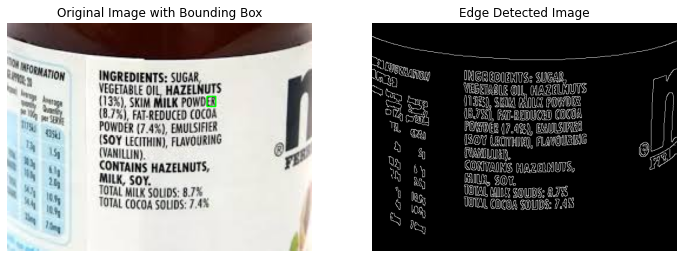

In [26]:
import numpy as np
import cv2
import imutils
from skimage.filters import threshold_local
import matplotlib.pyplot as plt

# Manually set the path to the image
image_path = "img3.jpg"

# Load the image and compute the ratio of the old height to the new height
image = cv2.imread(image_path)
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height=500)

# Convert the image to grayscale, blur it, and find edges
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# Step 2: Find the contour (outline) representing the document
# Find contours in the edged image
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours based on area, and keep the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

# Initialize the bounding box
bounding_box = None

# Loop through the contours to find the document's bounding box
for c in contours:
    # Approximate the contour
    epsilon = 0.02 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    # If the contour has 4 points, it's likely the document
    if len(approx) == 4:
        # Get the bounding box coordinates for the contour
        x, y, w, h = cv2.boundingRect(approx)
        bounding_box = (x, y, w, h)
        break

# If a bounding box is found, draw it
if bounding_box is not None:
    x, y, w, h = bounding_box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
else:
    print("No bounding box detected.")

# Show the image with the bounding box
print("STEP 2: Bounding Box Detection")

# Create a plot to display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image with bounding box
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image with Bounding Box')
ax[0].axis('off')

# Edge-detected image
ax[1].imshow(edged, cmap='gray')
ax[1].set_title('Edge Detected Image')
ax[1].axis('off')

# Show the plot
plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


--- Results for Image 1 ---
Tesseract OCR Result:
INGREDIENTS: Enriched unbleached
flour (wheat flour, malted barley flour,
ascorbic acid [dough conditioner), niacin,
reduced iron, thiamin mononitrate,
riboflavin, folic acid), sugar, degermed
yellow commeal, salt, leavening (bakin
soda, sodium acid pyro nae
soybean oil, honey powder, natural flavor.

CONTAINS: Wheat,
| May contain mil, eggs, soy and tree nuts.


EasyOCR Result:
INGREDIENTS:   Enriched   unbleached flour  (wheat Malted , barev  flouc; aSCOrOic acic (cough concitiorer]' niacin, reduced iron , iiamin mononitrate , riboflavin,  folic , acio    Sugar,, degermed  cormeal;, salt , leavening |baking soda, sodium acid , pyropnosohate}, soybean oil, 'powder; natural Hlavor; CONTAINS; Wheat 'contain mik; eggs, soy and tree nuts. Gloug, vellow honey " May C


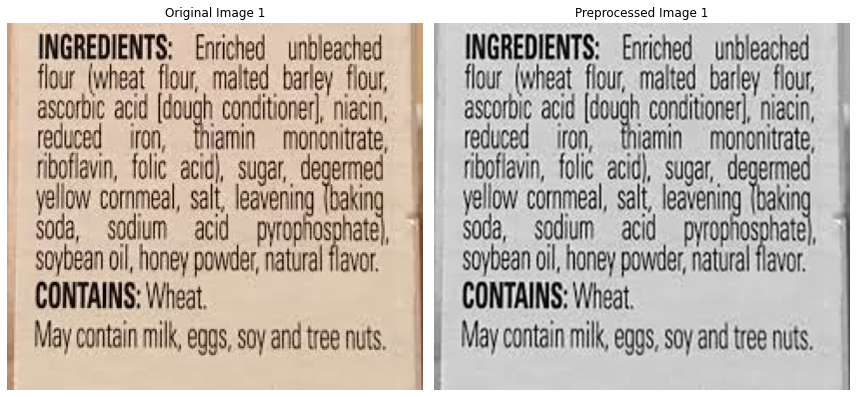

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


--- Results for Image 2 ---
Tesseract OCR Result:
Ingredients: Rolled Oats (25.1%), Candied Fruit and Nut (24%)
| {Candied Cranberry (14%), Almonds (10%)}, Sugar, Oat Flour (10.7%),
| Edible Vegetable Oil (Palmolein}, Rice (4.2%), Whole Wheat (3.9%),
Rice Flour (2.7%), Liquid Glucose, Corn Flour (1.8%), Honey, Malt Extract,
Wheat Bran (0.6%), Wheat Flour (0.5%), lodized Salt, Dextrose,
Barley Flour (0.1%), Vitamins, Raising Agent (INS 500ii),
Minerals, Antioxidant (INS 320)
CONTAINS ADDED FLAVOURS (NATURE IDENTICAL AND
ARTIFICIAL CREAM FLAVOURING SUBSTANCES)
| CONTAINS GLUTEN, ALMONDS.
| MAY CONTAIN TRACES OF SOY AND MILK.


EasyOCR Result:
Ingredients: Rolled Oats (25.1944 Candied Fruitand Nut (243) ICandied Cranberry(1491 Almonds (IOJ1, Sugar; Oat Flour (10.7938 Edible Vegetable Oil (Palmolein} Rice (4.2%), Wnole heat /3.971, Flour (2.744|, Liquid Glucose, Corn Flour (1,8950 Honey; Ma tt Extract;, Wheat Bran /0.6%:} Wnea: Flour (0.5*1,kdized Salt; Dextrose Barley Flour(Q./5}, Vitamin

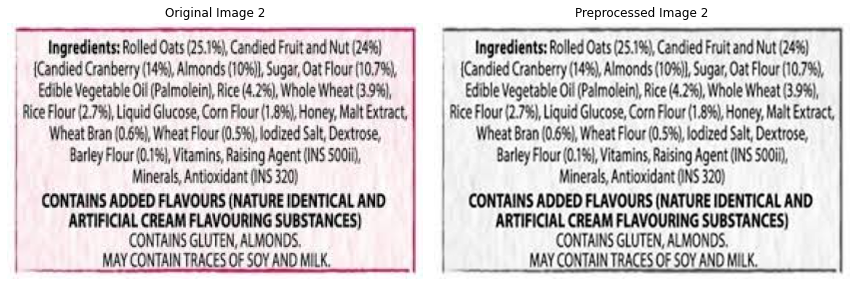

In [29]:
#easy ocr and pytesseract

import cv2
import numpy as np
import pytesseract
import easyocr
import matplotlib.pyplot as plt

# Set Tesseract executable path (if needed)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Function to preprocess an image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    orig = image.copy()

    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  
    
    # Step 6: Resize to improve OCR accuracy
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    return resized, orig

# Function to perform OCR using Tesseract
def perform_tesseract_ocr(image):
    return pytesseract.image_to_string(image)

# Function to perform OCR using EasyOCR
def perform_easyocr(image):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image)
    return " ".join([text for _, text, _ in results])

# File paths for your images
image_paths = ["img1.jpg", "img2.jpg"]

# Process images and perform OCR
for idx, image_path in enumerate(image_paths):
    # Preprocess image
    preprocessed, orig = preprocess_image(image_path)

    # Perform OCR
    tesseract_result = perform_tesseract_ocr(preprocessed)
    easyocr_result = perform_easyocr(preprocessed)

    # Show results
    print(f"--- Results for Image {idx + 1} ---")
    print("Tesseract OCR Result:")
    print(tesseract_result)
    print("\nEasyOCR Result:")
    print(easyocr_result)

    # Visualize original and preprocessed images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image {idx + 1}")
    ax[0].axis("off")
    ax[1].imshow(preprocessed, cmap="gray")
    ax[1].set_title(f"Preprocessed Image {idx + 1}")
    ax[1].axis("off")
    plt.tight_layout()
    plt.show()


# hugging face

In [35]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import cv2
import numpy as np

# Step 1: Image Preprocessing Function
def preprocess_image(image_path):
    """
    Preprocess the image for better OCR accuracy:
    - Convert to grayscale
    - Resize for consistent dimensions
    - Apply adaptive thresholding
    - Noise removal (if necessary)
    """
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize to improve OCR performance (Hugging Face TrOCR works better with consistent image sizes)
    height, width = gray.shape[:2]
    if max(height, width) > 1024:
        gray = cv2.resize(gray, (1024, int(1024 * height / width)) if width > height else (int(1024 * width / height), 1024))

    # Adaptive thresholding
    processed = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Noise removal (Optional: Apply median blur if noisy)
    processed = cv2.medianBlur(processed, 3)

    # Save the processed image for OCR
    processed_image_path = "processed_image.jpg"
    cv2.imwrite(processed_image_path, processed)

    return processed_image_path

# Step 2: Hugging Face OCR Function
def huggingface_ocr(image_path):
    """
    Use Hugging Face's TrOCR model to extract text from an image.
    """
    # Load the pre-trained model and processor
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and make predictions
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return generated_text

# Step 3: Image-to-Text Function
def image_to_text_pipeline(image_path):
    """
    Complete pipeline to process an image and extract text.
    """
    print("Preprocessing the image...")
    processed_image_path = preprocess_image(image_path)

    print("Performing OCR using Hugging Face TrOCR...")
    extracted_text = huggingface_ocr(processed_image_path)

    return extracted_text

# Step 4: Test the pipeline
if __name__ == "__main__":
    # Replace with your image path
    image_paths = ["img1.jpg", "img2.jpg","img3.jpg"]

    for idx, image_path in enumerate(image_paths):
        print(f"\n--- Processing Image {idx + 1} ---")
        try:
            text = image_to_text_pipeline(image_path)
            print(f"Extracted Text from Image {idx + 1}:\n{text}")
        except Exception as e:
            print(f"Failed to process Image {idx + 1}. Error: {e}")



--- Processing Image 1 ---
Preprocessing the image...
Performing OCR using Hugging Face TrOCR...


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted Text from Image 1:
If you seem like the best of the best of the best of the best of the first ever

--- Processing Image 2 ---
Preprocessing the image...
Performing OCR using Hugging Face TrOCR...


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted Text from Image 2:
sUDI 1

--- Processing Image 3 ---
Preprocessing the image...
Performing OCR using Hugging Face TrOCR...


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted Text from Image 3:
a b c d e f. i. i. i. Fig.


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


--- Results for Image 1 ---
Tesseract OCR Result:
tarey
bie a ico cmt |
rou, (emia mon
{elie avie), sug
el cred It, leazering
ode, sodium acid pytopns
soybean a, taney power, natal
CONTAINS: Wheat

‘May conteln mit, eggs, soy and tee



EasyOCR Result:
INGREDIENTS: Enriched   W: eached flour i#heat Ma:ted barey ESCCHOX [GGugh concitorer]  mecin, [ZOLSC ] (nam7 Monwntrate;, bcf ww1, CCC SJgcr; Low' Cof "Ceal lcavering 0ue SOCa _ Spd.U acid pHCp posprate , SCybea") oul, 'oney pewder, natural Hlavor; CONTAINS: Whzat Maycontain mik, eos Sov aric txee ruts. Fcu". Toc


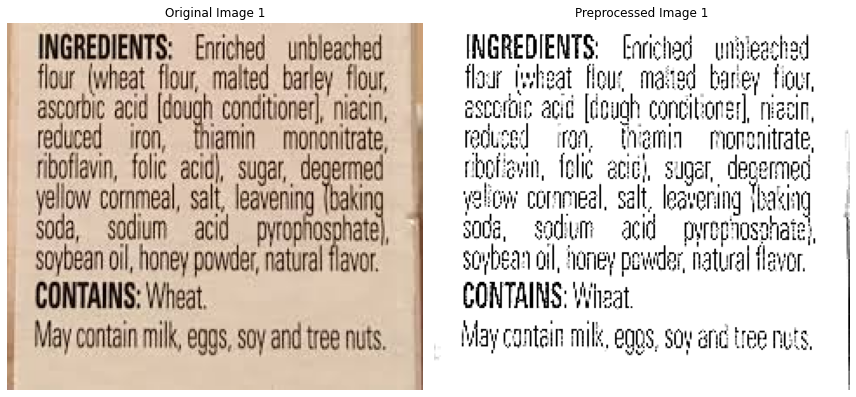

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


--- Results for Image 2 ---
Tesseract OCR Result:
Serving size

‘Amount per sesving

Gere



EasyOCR Result:
Nutrition Facts scrvings per container Serving size Amolnt per serving Calories 15 DV* Total Fat Og 0% Sodium 0% Total Carb: 2g Protein lg Potassium 376mng si; Vinliczl Lagie osal lal.rars Iai. Cdes= deary hzer. Ijta' siza1$. e8*td Suza;s cakiUI 2nd ir*I Cv= Javl} "lt IKSREL BREWEO OFFE KQUTeR;, CoFED ITURALFLAYORS pod Qmg


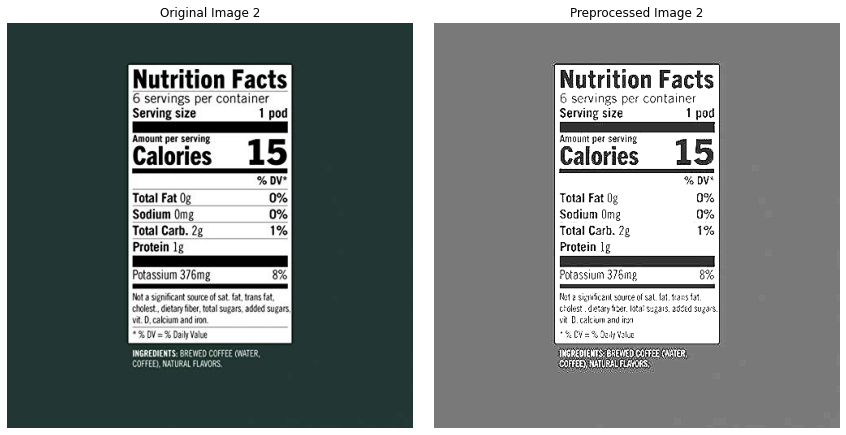

In [45]:
import cv2
import numpy as np
import pytesseract
import easyocr
import matplotlib.pyplot as plt

# Set Tesseract executable path (if needed)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Function to preprocess an image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    orig = image.copy()

    # Step 1: Convert to grayscale
    
    resized = cv2.resize(orig, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    alpha = 1.5
    
    beta = 50  
    image2 = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta) 
    
    
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(image2, -1, kernel)
    
    return sharpened_image, orig

# Function to perform OCR using Tesseract
def perform_tesseract_ocr(image):
    return pytesseract.image_to_string(image)

# Function to perform OCR using EasyOCR
def perform_easyocr(image):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image)
    return " ".join([text for _, text, _ in results])

# File paths for your images
image_paths = ["img1.jpg", "img4.jpg"]

# Process images and perform OCR
for idx, image_path in enumerate(image_paths):
    # Preprocess image
    preprocessed, orig = preprocess_image(image_path)

    # Perform OCR
    tesseract_result = perform_tesseract_ocr(preprocessed)
    easyocr_result = perform_easyocr(preprocessed)

    # Show results
    print(f"--- Results for Image {idx + 1} ---")
    print("Tesseract OCR Result:")
    print(tesseract_result)
    print("\nEasyOCR Result:")
    print(easyocr_result)

    # Visualize original and preprocessed images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image {idx + 1}")
    ax[0].axis("off")
    ax[1].imshow(preprocessed, cmap="gray")
    ax[1].set_title(f"Preprocessed Image {idx + 1}")
    ax[1].axis("off")
    plt.tight_layout()
    plt.show()


In [48]:
!pip install transformers torch


In [ ]:
from transformers import pipeline

# Load a text-generation pipeline with GPT-Neo
generator = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

# Define your input prompt
ingredients = "Sugar, turmeric, black pepper, salt"
prompt = f"Explain the health benefits and potential harms of the following ingredients: {ingredients}."

# Generate the health report
response = generator(prompt, max_length=300, num_return_sequences=1)
print("Health Report:", response[0]["generated_text"])


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

C:\Users\DC\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DC\.cache\huggingface\hub\models--EleutherAI--gpt-neo-1.3B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
!pip install Xformers